# Self-RAG
论文地址：https://arxiv.org/pdf/2310.11511.pdf

Github地址：https://github.com/AkariAsai/self-rag

尽管LLM（大型语言模型）的模型和数据规模不断增加，但它们仍然面临事实错误的问题。现有的Retrieval-Augmented Generation (RAG)方法可以通过增强LLM的输入来减少知识密集任务中的事实错误，但可能会影响模型的通用性或引入无关的、低质量的内容。

## RAG存在的问题
- top-k文本可能不能包含回答问题的所有信息
- 召回文本可能只包含问题的信息而没有相对应的答案

## self-RAG
通过按需检索和自我反思来改进LLM的生成质量。 
- self-RAG会训练一个任意的LM（比如Llama2–7B和13B），使其能够反思自己的生成过程，并生成任务输出和中间的特殊tokens（reflection tokens）（比如[Retrieval], [No Retrieval], [Relevant], [Irrelevant], [No support / Contradictory], [Partially supported], [Utility]等）。这些reflection(反思) tokens被分类为检索tokens和批评tokens，分别表示需要检索的需求和其生成质量。

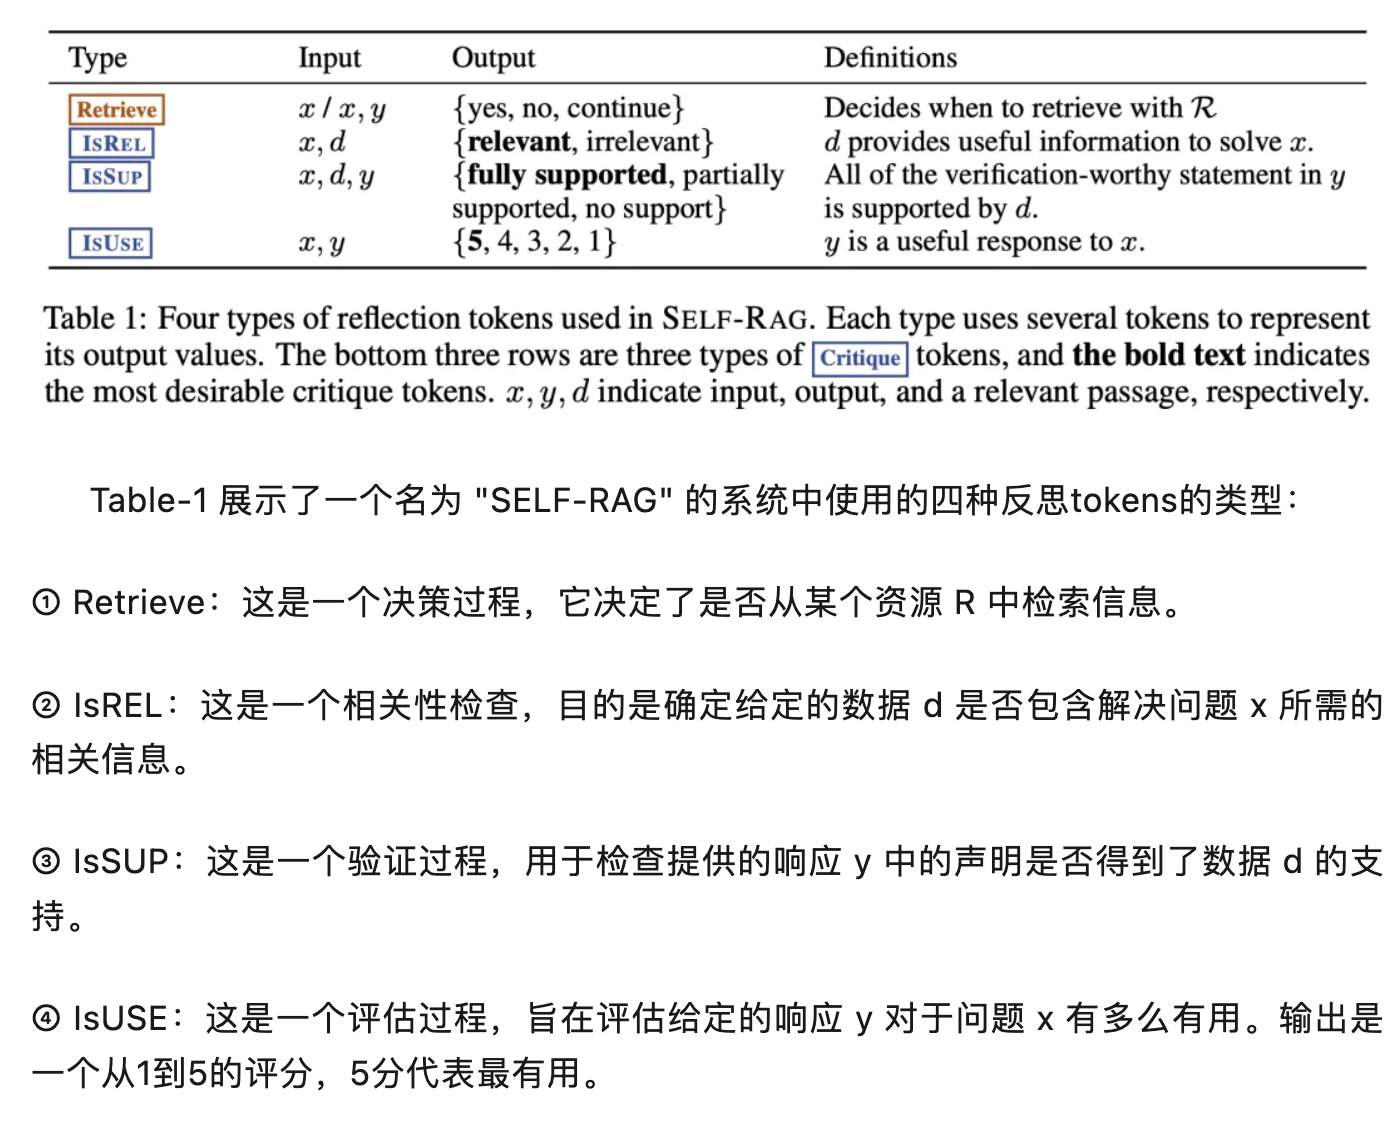

### 常规方法 RAG

Retrieval-Augmented Generation (RAG)

Step 1: 基于一个特定的提示（例如：“How did US states get their names?”）从数据源中检索K个文档。

Step 2: 使用这K个检索到的文档来引导语言模型(LM)生成答案。

### 新的方法 Self-RAG

Self-reflective Retrieval-Augmented Generation (Self-RAG)

Step 1: 基于同样的提示，按需进行检索。这意味着可能不是一次性检索所有文档，而是根据需要逐个检索。

Step 2: 并行生成各个段落，每个提示后都跟着一个检索到的文档。例如，Prompt + 1会生成与第一个文档相关的内容，同理，Prompt + 2和Prompt + 3也是如此。

Step 3: 对输出进行评价，并选择最佳的段落。这一步骤是Self-RAG的核心，它使模型能够评判自己的输出，选择最准确和相关的段落，并对其进行迭代或改进。